# Michał Gromadzki - HW9

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### a)

In [40]:
n = 5000
X1 = np.random.normal(1, 1, size=n)
X2 = np.random.normal(5, 2, size=n)
bern = np.random.binomial(1, 0.3, size=n)
X = np.where(bern, X1, X2)

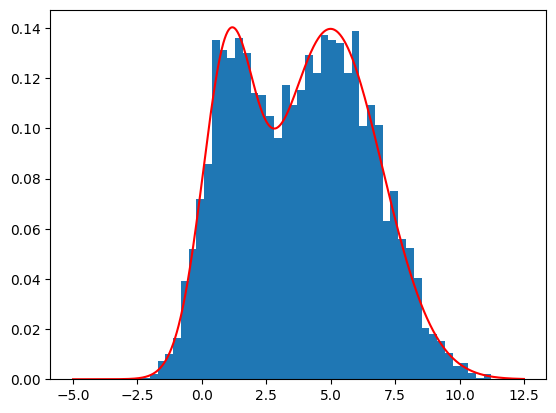

In [41]:
plt.hist(X, bins=50, density=True)
x = np.linspace(-5, 12.5, 1000)
y = 0.3 * np.exp(-0.5 * (x - 1) ** 2) / np.sqrt(2 * np.pi) + 0.7 * np.exp(-0.5 * (x - 5) ** 2 / 4) / np.sqrt(8 * np.pi)
plt.plot(x, y, 'r')
plt.show()

### b)

In [42]:
def log_likelihood(G, X, mu1, mu2, sigma1, sigma2, pi):
    return np.sum(np.log(np.exp(-0.5 * (X - mu1) ** 2 / sigma1 ** 2) / np.sqrt(2 * np.pi * sigma1 ** 2)) * (1 - G) + 
                  np.log(np.exp(-0.5 * (X - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2)) * G +
                  (1 - G) * np.log(1-pi) + G * np.log(pi))

In [43]:
log_likelihood(bern, X, 1, 5, 1, 2, 0.3)

-47052.23103267387

### c)

In [44]:
def e_step(X, mu1, mu2, sigma1, sigma2, pi):
    G = pi * np.exp(-0.5 * (X - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2) / (
        pi * np.exp(-0.5 * (X - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2) + 
        (1 - pi) * np.exp(-0.5 * (X - mu1) ** 2 / sigma1 ** 2) / np.sqrt(2 * np.pi * sigma1 ** 2))
    return G

In [52]:
g = e_step(X, 1, 5, 1, 2, 0.3)
g = np.where(g > 0.5, 1, 0)
acc = np.mean(g == bern)
acc

0.1244

### d)

In [56]:
# m-step
def m_step(G, X):
    pi = np.mean(G)
    mu1 = np.sum((1 - G) * X) / np.sum(1 - G)
    mu2 = np.sum(G * X) / np.sum(G)
    sigma1 = np.sqrt(np.sum((1 - G) * (X - mu1) ** 2) / np.sum(1 - G))
    sigma2 = np.sqrt(np.sum(G * (X - mu2) ** 2) / np.sum(G))
    return mu1, mu2, sigma1, sigma2, pi

In [61]:
def EM(X, tol=1e-6):
    mu1, mu2, sigma1, sigma2, pi = 0, 1, 1, 1, 0.5
    l_hist = [] 
    l = -np.inf
    while True:
        G = e_step(X, mu1, mu2, sigma1, sigma2, pi)
        mu1, mu2, sigma1, sigma2, pi = m_step(G, X)
        l_new = log_likelihood(G, X, mu1, mu2, sigma1, sigma2, pi)
        l_hist.append(l_new)
        if l_new - l < tol:
            break
        l = l_new
    return mu1, mu2, sigma1, sigma2, pi, l_hist

In [77]:
mu1, mu2, sigma1, sigma2, pi, l_hist = EM(X, 1e-8)

In [78]:
mu1, mu2, sigma1, sigma2, pi

(1.0368510289050359,
 5.06111633753595,
 1.0408681233699262,
 1.9837715020113527,
 0.6883614845018785)

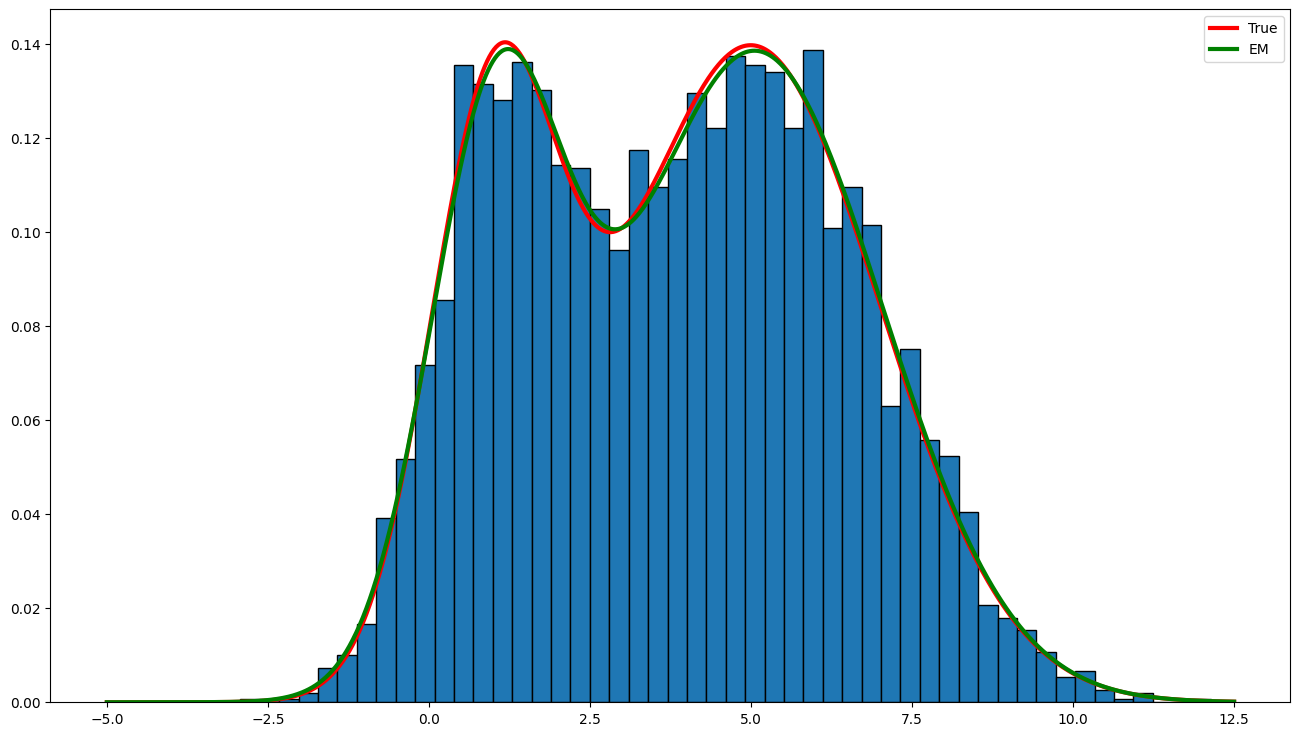

In [79]:
plt.figure(figsize=(16, 9))
plt.hist(X, bins=50, density=True, edgecolor='black')
x = np.linspace(-5, 12.5, 1000)
y = 0.3 * np.exp(-0.5 * (x - 1) ** 2) / np.sqrt(2 * np.pi) + 0.7 * np.exp(-0.5 * (x - 5) ** 2 / 4) / np.sqrt(8 * np.pi)
plt.plot(x, y, 'r', linewidth=3)
y = pi * np.exp(-0.5 * (x - mu2) ** 2 / sigma2 ** 2) / np.sqrt(2 * np.pi * sigma2 ** 2) + (1 - pi) * np.exp(-0.5 * (x - mu1) ** 2 / sigma1 ** 2) / np.sqrt(2 * np.pi * sigma1 ** 2)
plt.plot(x, y, 'g', linewidth=3)
plt.legend(['True', 'EM'])
plt.show()

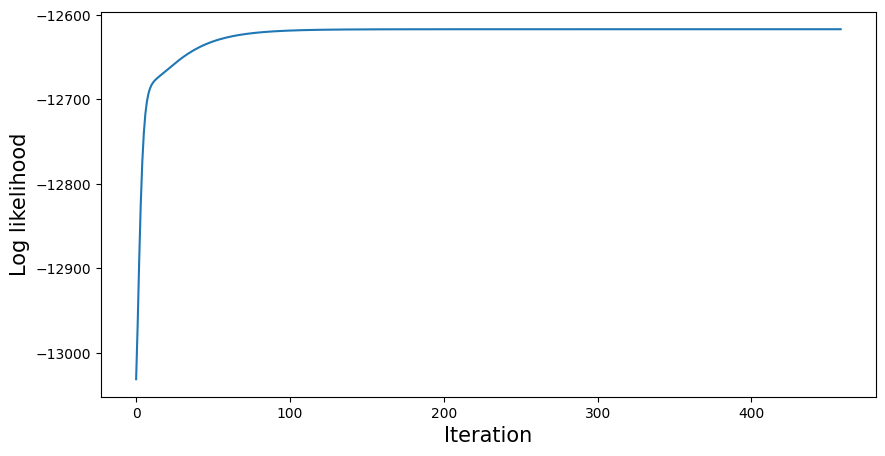

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(l_hist)
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Log likelihood', fontsize=15)
plt.show()